In [4]:
# An√°lise Explorat√≥ria de Dados - Dataset de Diabetes
# Objetivo: Obter insights para prepara√ß√£o dos dados para treinamento de modelo de ML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configura√ß√µes
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Bibliotecas importadas com sucesso!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")


Bibliotecas importadas com sucesso!
Pandas version: 2.3.2
NumPy version: 2.3.3
Seaborn version: 0.13.2


In [5]:
# Carregamento dos dados
df = pd.read_csv('../data/raw/diabetes_dataset.csv')

print("="*60)
print("INFORMA√á√ïES B√ÅSICAS DO DATASET")
print("="*60)
print(f"Shape do dataset: {df.shape}")
print(f"N√∫mero de linhas: {df.shape[0]:,}")
print(f"N√∫mero de colunas: {df.shape[1]}")
print(f"Tamanho em mem√≥ria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*60)
print("PRIMEIRAS 5 LINHAS")
print("="*60)
df.head()


INFORMA√á√ïES B√ÅSICAS DO DATASET
Shape do dataset: (100000, 31)
N√∫mero de linhas: 100,000
N√∫mero de colunas: 31
Tamanho em mem√≥ria: 55.81 MB

PRIMEIRAS 5 LINHAS


age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   
2                                  57         6.4                 10.0   
3                                  49         3.4                  6.6   
4                                 109         7.2                  7.4   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   
2                        8.1                        1                     0   
3                        5.2                        0                     0   
4                        5.0                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   
2                       0  22.2                0.81          115   
3                       0  26.8                0.88          120   
4                       0  21.2                0.78           92   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   
2            73          74                213               66   
3            93          68                171               50   
4            67          67                210               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score diabetes_stage  \
0           6.36   8.18                 29.6         Type 2   
1           2.00   5.63                 23.0    No Diabetes   
2           5.07   7.51                 44.7         Type 2   
3           5.28   9.03                 38.2         Type 2   
4          12.74   7.20                 23.5         Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1

In [6]:
# An√°lise de informa√ß√µes gerais
print("="*60)
print("INFORMA√á√ïES DETALHADAS DO DATASET")
print("="*60)

print("\n1. TIPOS DE DADOS:")
print("-" * 30)
print(df.dtypes.value_counts())

print("\n2. INFORMA√á√ïES SOBRE VALORES NULOS:")
print("-" * 30)
null_info = pd.DataFrame({
    'Coluna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Percentual_Nulos': (df.isnull().sum() / len(df)) * 100,
    'Tipo_Dados': df.dtypes
})
print(null_info[null_info['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False))

print("\n3. COLUNAS COM VALORES √öNICOS:")
print("-" * 30)
unique_counts = df.nunique().sort_values()
print(unique_counts)

print("\n4. INFORMA√á√ïES GERAIS:")
print("-" * 30)
df.info()


INFORMA√á√ïES DETALHADAS DO DATASET

1. TIPOS DE DADOS:
------------------------------
int64      16
float64     8
object      7
Name: count, dtype: int64

2. INFORMA√á√ïES SOBRE VALORES NULOS:
------------------------------
Empty DataFrame
Columns: [Coluna, Valores_Nulos, Percentual_Nulos, Tipo_Dados]
Index: []

3. COLUNAS COM VALORES √öNICOS:
------------------------------
cardiovascular_history                   2
family_history_diabetes                  2
hypertension_history                     2
diagnosed_diabetes                       2
smoking_status                           3
gender                                   3
education_level                          4
employment_status                        4
ethnicity                                5
income_level                             5
diabetes_stage                           5
alcohol_consumption_per_week            11
waist_to_hip_ratio                      40
diastolic_bp                            60
heart_rate          

In [7]:
# Identifica√ß√£o de vari√°veis num√©ricas e categ√≥ricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("="*60)
print("CLASSIFICA√á√ÉO DAS VARI√ÅVEIS")
print("="*60)
print(f"Vari√°veis num√©ricas ({len(numeric_columns)}): {numeric_columns}")
print(f"\nVari√°veis categ√≥ricas ({len(categorical_columns)}): {categorical_columns}")

print("\n" + "="*60)
print("ESTAT√çSTICAS DESCRITIVAS - VARI√ÅVEIS NUM√âRICAS")
print("="*60)
desc_stats = df[numeric_columns].describe()
print(desc_stats.round(2))


CLASSIFICA√á√ÉO DAS VARI√ÅVEIS
Vari√°veis num√©ricas (24): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diagnosed_diabetes']

Vari√°veis categ√≥ricas (7): ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

ESTAT√çSTICAS DESCRITIVAS - VARI√ÅVEIS NUM√âRICAS
             age  alcohol_consumption_per_week  \
count  100000.00                     100000.00   
mean       50.12                          2.00   
std        15.60                          1.42   
min        18.00                          0.00   
25%      

In [8]:
# An√°lise adicional das vari√°veis num√©ricas
print("="*60)
print("AN√ÅLISE DE DISTRIBUI√á√ÉO - VARI√ÅVEIS NUM√âRICAS")
print("="*60)

# Calcular skewness e kurtosis
distribution_analysis = pd.DataFrame({
    'Coluna': numeric_columns,
    'Skewness': [stats.skew(df[col].dropna()) for col in numeric_columns],
    'Kurtosis': [stats.kurtosis(df[col].dropna()) for col in numeric_columns],
    'CV': [df[col].std() / df[col].mean() for col in numeric_columns]  # Coeficiente de varia√ß√£o
})

distribution_analysis['Distribuicao'] = distribution_analysis['Skewness'].apply(
    lambda x: 'Normal' if abs(x) < 0.5 else 'Assim√©trica' if abs(x) < 1 else 'Muito Assim√©trica'
)

print(distribution_analysis.round(3))

print("\n" + "="*60)
print("AN√ÅLISE DE VARIABILIDADE")
print("="*60)
print("Coeficiente de Varia√ß√£o (CV = std/mean):")
print("- CV < 0.1: Baixa variabilidade")
print("- 0.1 ‚â§ CV < 0.3: M√©dia variabilidade") 
print("- CV ‚â• 0.3: Alta variabilidade")

high_variability = distribution_analysis[distribution_analysis['CV'] >= 0.3]
print(f"\nVari√°veis com alta variabilidade (CV ‚â• 0.3): {len(high_variability)}")
if len(high_variability) > 0:
    print(high_variability[['Coluna', 'CV']].round(3))


AN√ÅLISE DE DISTRIBUI√á√ÉO - VARI√ÅVEIS NUM√âRICAS
                                Coluna  Skewness  Kurtosis     CV  \
0                                  age     0.083    -0.388  0.311   
1         alcohol_consumption_per_week     0.703     0.452  0.708   
2   physical_activity_minutes_per_week     1.390     2.812  0.710   
3                           diet_score    -0.070    -0.220  0.297   
4                  sleep_hours_per_day    -0.013    -0.112  0.156   
5            screen_time_hours_per_day     0.083    -0.177  0.412   
6              family_history_diabetes     1.356    -0.161  1.886   
7                 hypertension_history     1.150    -0.678  1.728   
8               cardiovascular_history     3.116     7.712  3.410   
9                                  bmi     0.006    -0.057  0.140   
10                  waist_to_hip_ratio     0.006    -0.014  0.055   
11                         systolic_bp     0.219    -0.318  0.123   
12                        diastolic_bp     0.007    

In [9]:
# An√°lise das vari√°veis categ√≥ricas
print("="*60)
print("AN√ÅLISE DAS VARI√ÅVEIS CATEG√ìRICAS")
print("="*60)

for col in categorical_columns:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    value_counts = df[col].value_counts()
    print(f"N√∫mero de categorias: {len(value_counts)}")
    print(f"Valores √∫nicos: {df[col].nunique()}")
    print("\nDistribui√ß√£o:")
    print(value_counts.head(10))  # Mostra as 10 categorias mais frequentes
    
    if len(value_counts) > 10:
        print(f"... e mais {len(value_counts) - 10} categorias")
    
    # Calcular percentuais
    percentages = (value_counts / len(df)) * 100
    print(f"\nPercentuais das principais categorias:")
    print(percentages.head(5).round(2))
    
    print("\n" + "="*50)


AN√ÅLISE DAS VARI√ÅVEIS CATEG√ìRICAS

GENDER:
----------------------------------------
N√∫mero de categorias: 3
Valores √∫nicos: 3

Distribui√ß√£o:
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

Percentuais das principais categorias:
gender
Female    50.22
Male      47.77
Other      2.01
Name: count, dtype: float64


ETHNICITY:
----------------------------------------
N√∫mero de categorias: 5
Valores √∫nicos: 5

Distribui√ß√£o:
ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

Percentuais das principais categorias:
ethnicity
White       45.00
Hispanic    20.10
Black       17.99
Asian       11.86
Other        5.05
Name: count, dtype: float64


EDUCATION_LEVEL:
----------------------------------------
N√∫mero de categorias: 4
Valores √∫nicos: 4

Distribui√ß√£o:
education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No formal        5100
Name: count, d

In [10]:
# An√°lise da vari√°vel target
print("="*60)
print("AN√ÅLISE DA VARI√ÅVEL TARGET")
print("="*60)

# Verificar se temos as colunas de diabetes
diabetes_columns = [col for col in df.columns if 'diabetes' in col.lower()]
print(f"Colunas relacionadas ao diabetes: {diabetes_columns}")

for col in diabetes_columns:
    print(f"\n{col.upper()}:")
    print("-" * 40)
    
    if df[col].dtype == 'object':
        # Vari√°vel categ√≥rica
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        print("Distribui√ß√£o:")
        for value, count in value_counts.items():
            print(f"  {value}: {count:,} ({percentages[value]:.2f}%)")
            
    else:
        # Vari√°vel num√©rica
        print(f"Tipo: Num√©rica")
        print(f"Valores √∫nicos: {df[col].nunique()}")
        print(f"Valores: {sorted(df[col].unique())}")
        
        value_counts = df[col].value_counts().sort_index()
        percentages = (value_counts / len(df)) * 100
        
        print("Distribui√ß√£o:")
        for value, count in value_counts.items():
            print(f"  {value}: {count:,} ({percentages[value]:.2f}%)")

# An√°lise de balanceamento da classe
if 'diagnosed_diabetes' in df.columns:
    print(f"\n" + "="*60)
    print("AN√ÅLISE DE BALANCEAMENTO DA CLASSE")
    print("="*60)
    
    class_distribution = df['diagnosed_diabetes'].value_counts()
    class_percentages = (class_distribution / len(df)) * 100
    
    print("Distribui√ß√£o da classe target:")
    for class_val, count in class_distribution.items():
        print(f"  Classe {class_val}: {count:,} ({class_percentages[class_val]:.2f}%)")
    
    # Verificar se est√° balanceado
    min_percentage = class_percentages.min()
    max_percentage = class_percentages.max()
    imbalance_ratio = max_percentage / min_percentage
    
    print(f"\nRaz√£o de desbalanceamento: {imbalance_ratio:.2f}")
    if imbalance_ratio > 2:
        print("‚ö†Ô∏è  ATEN√á√ÉO: Dataset desbalanceado! Considere t√©cnicas de balanceamento.")
    else:
        print("‚úÖ Dataset relativamente balanceado.")


AN√ÅLISE DA VARI√ÅVEL TARGET
Colunas relacionadas ao diabetes: ['family_history_diabetes', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']

FAMILY_HISTORY_DIABETES:
----------------------------------------
Tipo: Num√©rica
Valores √∫nicos: 2
Valores: [np.int64(0), np.int64(1)]
Distribui√ß√£o:
  0: 78,059 (78.06%)
  1: 21,941 (21.94%)

DIABETES_RISK_SCORE:
----------------------------------------
Tipo: Num√©rica
Valores √∫nicos: 569
Valores: [np.float64(2.7), np.float64(4.2), np.float64(4.6), np.float64(4.8), np.float64(5.0), np.float64(5.1), np.float64(5.3), np.float64(5.5), np.float64(5.9), np.float64(6.1), np.float64(6.2), np.float64(6.3), np.float64(6.5), np.float64(6.6), np.float64(6.7), np.float64(6.8), np.float64(6.9), np.float64(7.0), np.float64(7.1), np.float64(7.2), np.float64(7.3), np.float64(7.4), np.float64(7.5), np.float64(7.6), np.float64(7.7), np.float64(7.8), np.float64(7.9), np.float64(8.0), np.float64(8.1), np.float64(8.2), np.float64(8.3), np.float64(8.

In [11]:
# An√°lise de correla√ß√µes
print("="*60)
print("AN√ÅLISE DE CORRELA√á√ïES")
print("="*60)

# Matriz de correla√ß√£o para vari√°veis num√©ricas
correlation_matrix = df[numeric_columns].corr()

print("1. CORRELA√á√ïES COM A VARI√ÅVEL TARGET:")
print("-" * 40)
if 'diagnosed_diabetes' in numeric_columns:
    target_correlations = correlation_matrix['diagnosed_diabetes'].drop('diagnosed_diabetes').sort_values(key=abs, ascending=False)
    print("Correla√ß√µes com diagnosed_diabetes:")
    for var, corr in target_correlations.head(10).items():
        print(f"  {var}: {corr:.3f}")

print("\n2. CORRELA√á√ïES MAIS FORTES (|r| > 0.7):")
print("-" * 40)
# Encontrar correla√ß√µes fortes (excluindo a diagonal)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlacao': corr_value
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations).sort_values('Correlacao', key=abs, ascending=False)
    print(strong_corr_df.round(3))
else:
    print("Nenhuma correla√ß√£o forte encontrada (|r| > 0.7)")

print("\n3. CORRELA√á√ïES MODERADAS (0.5 < |r| ‚â§ 0.7):")
print("-" * 40)
moderate_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_value) <= 0.7:
            moderate_correlations.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlacao': corr_value
            })

if moderate_correlations:
    moderate_corr_df = pd.DataFrame(moderate_correlations).sort_values('Correlacao', key=abs, ascending=False)
    print(moderate_corr_df.head(10).round(3))
else:
    print("Nenhuma correla√ß√£o moderada encontrada (0.5 < |r| ‚â§ 0.7)")


AN√ÅLISE DE CORRELA√á√ïES
1. CORRELA√á√ïES COM A VARI√ÅVEL TARGET:
----------------------------------------
Correla√ß√µes com diagnosed_diabetes:
  hba1c: 0.679
  glucose_postprandial: 0.630
  glucose_fasting: 0.511
  diabetes_risk_score: 0.277
  family_history_diabetes: 0.198
  age: 0.138
  physical_activity_minutes_per_week: -0.101
  bmi: 0.097
  systolic_bp: 0.095
  waist_to_hip_ratio: 0.079

2. CORRELA√á√ïES MAIS FORTES (|r| > 0.7):
----------------------------------------
                      Var1                 Var2  Correlacao
4     glucose_postprandial                hba1c       0.933
2        cholesterol_total      ldl_cholesterol       0.906
1                      bmi   waist_to_hip_ratio       0.766
0  family_history_diabetes  diabetes_risk_score       0.733
3          glucose_fasting                hba1c       0.700

3. CORRELA√á√ïES MODERADAS (0.5 < |r| ‚â§ 0.7):
----------------------------------------
                   Var1                  Var2  Correlacao
4         

VISUALIZA√á√ïES EXPLORAT√ìRIAS


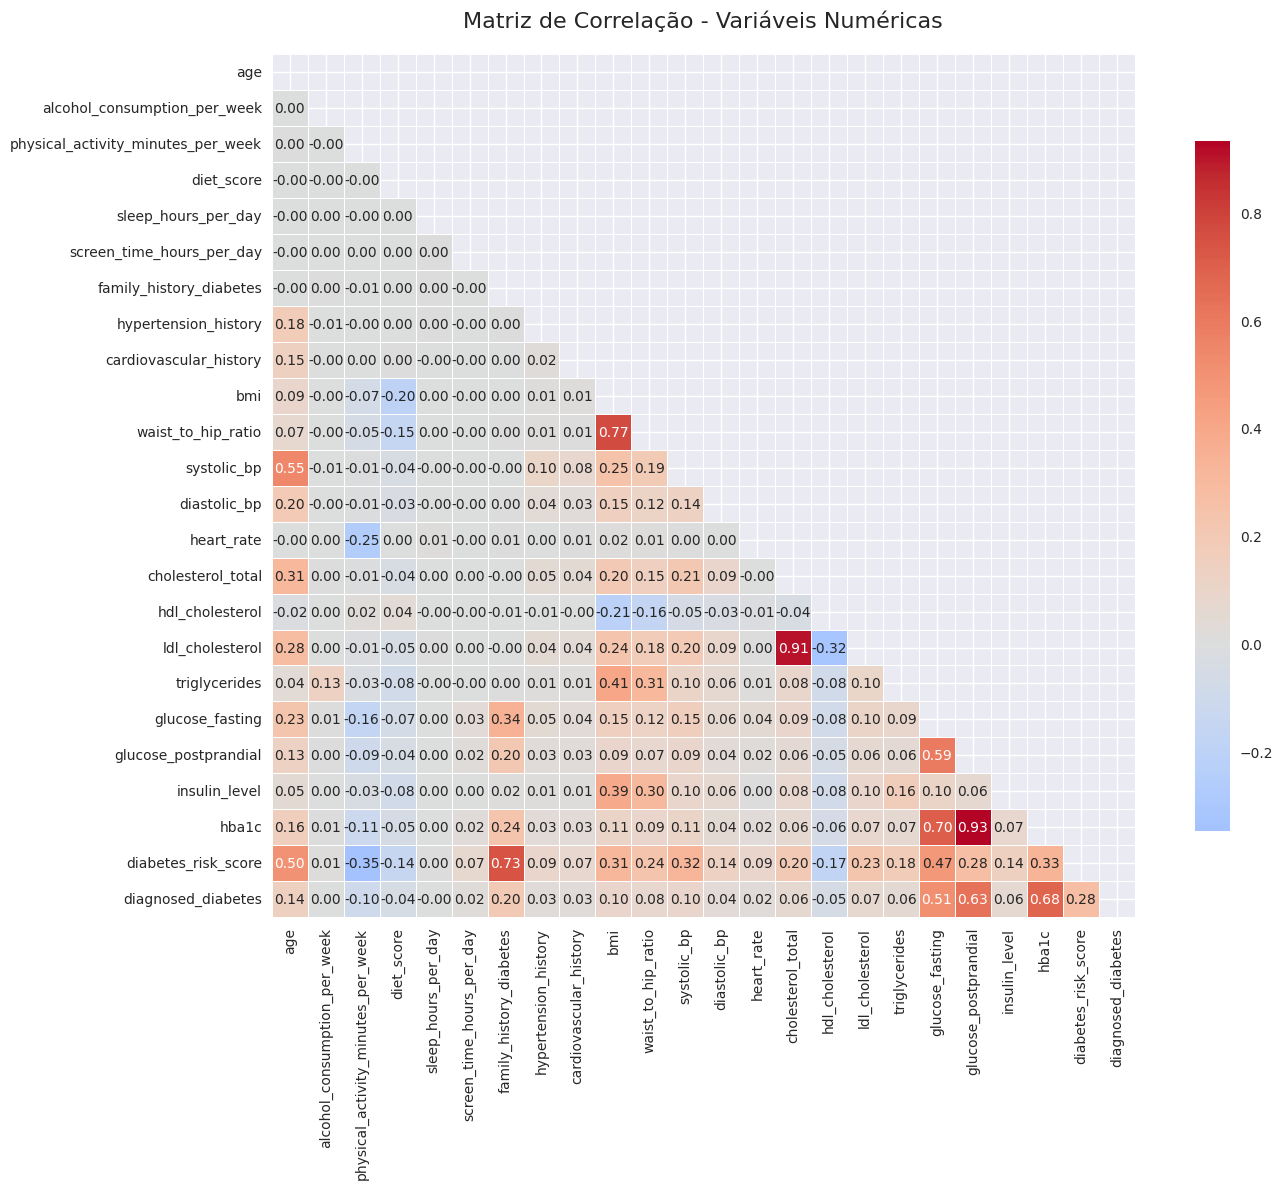

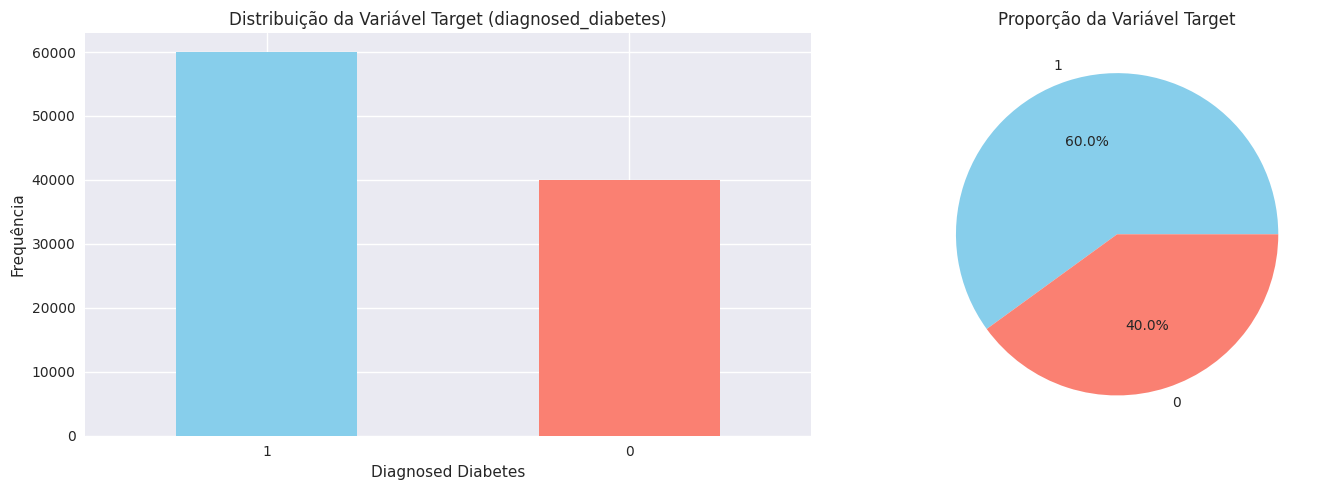

In [12]:
# Visualiza√ß√µes explorat√≥rias
print("="*60)
print("VISUALIZA√á√ïES EXPLORAT√ìRIAS")
print("="*60)

# 1. Heatmap de correla√ß√µes
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Matriz de Correla√ß√£o - Vari√°veis Num√©ricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. Distribui√ß√£o da vari√°vel target
if 'diagnosed_diabetes' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gr√°fico de barras
    df['diagnosed_diabetes'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title('Distribui√ß√£o da Vari√°vel Target (diagnosed_diabetes)')
    axes[0].set_xlabel('Diagnosed Diabetes')
    axes[0].set_ylabel('Frequ√™ncia')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Gr√°fico de pizza
    df['diagnosed_diabetes'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                                 colors=['skyblue', 'salmon'])
    axes[1].set_title('Propor√ß√£o da Vari√°vel Target')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()


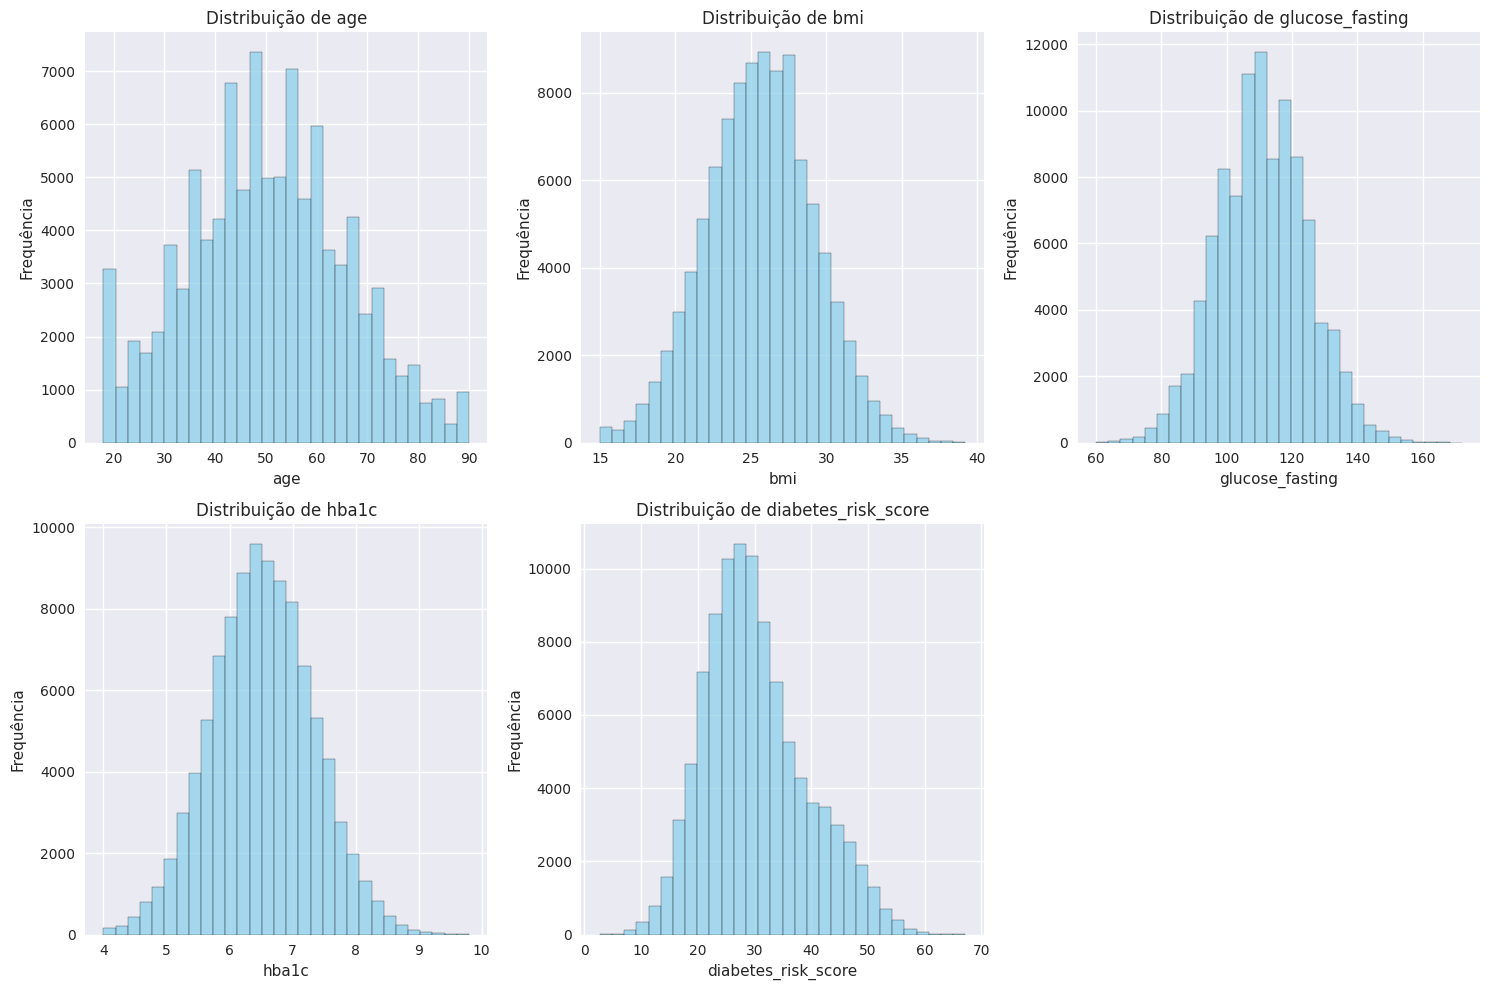

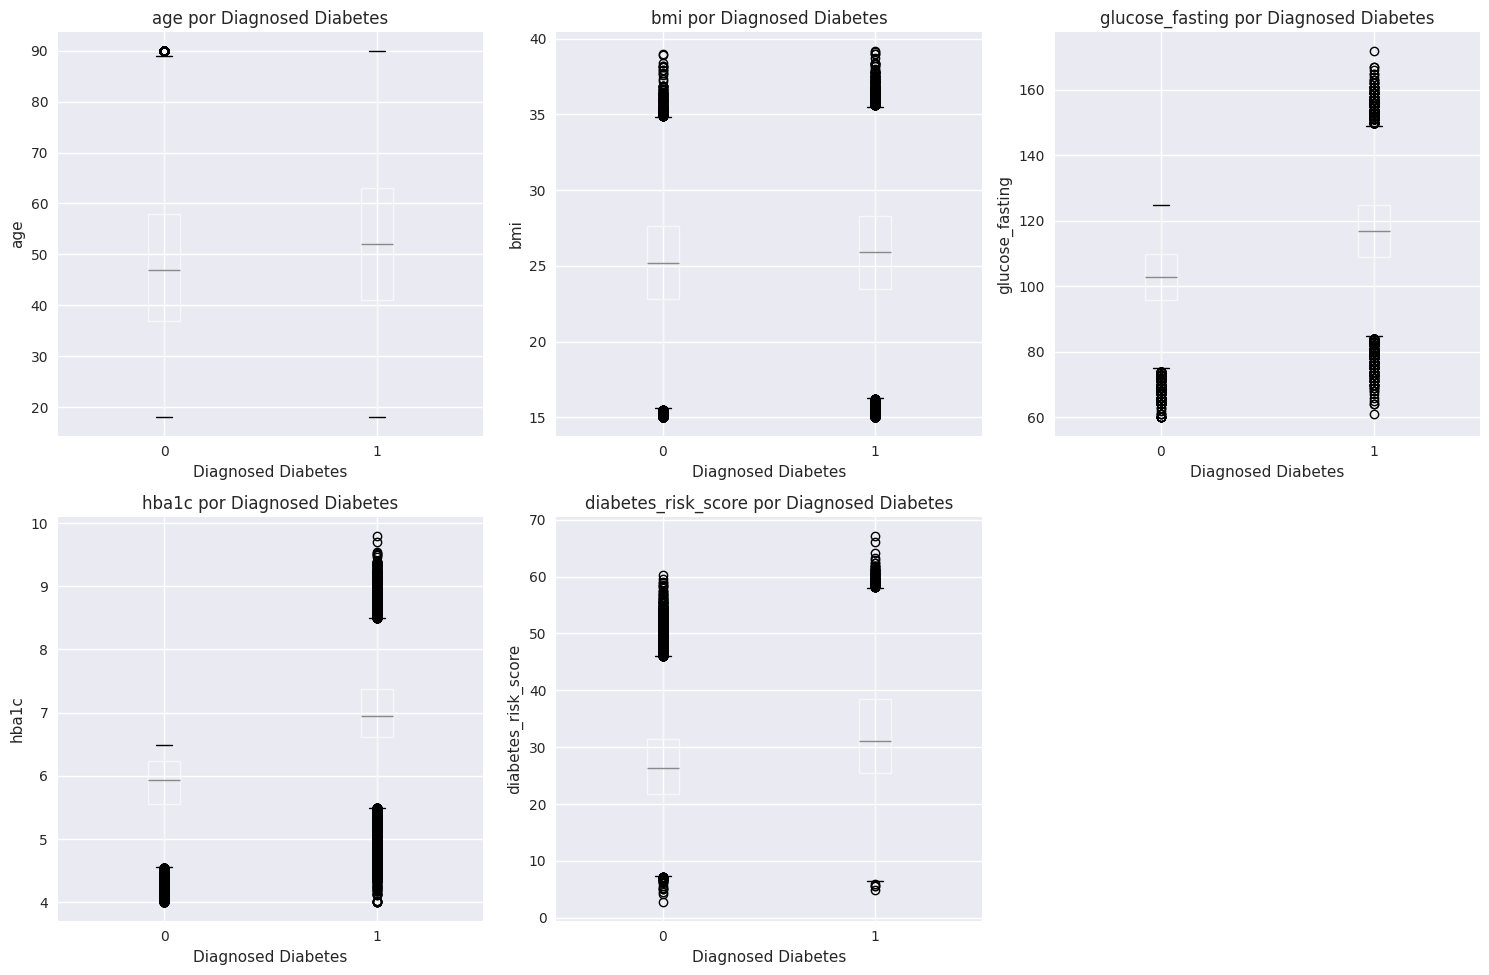

In [ ]:
# 3. Histogramas das vari√°veis num√©ricas mais importantes
important_numeric_vars = ['age', 'bmi', 'glucose_fasting', 'hba1c', 'diabetes_risk_score']
available_vars = [var for var in important_numeric_vars if var in numeric_columns]

if available_vars:
    n_vars = len(available_vars)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, var in enumerate(available_vars):
        if i < len(axes):
            axes[i].hist(df[var].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribui√ß√£o de {var}')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Frequ√™ncia')
    
    # Remover subplots vazios
    for i in range(len(available_vars), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# 4. Boxplots das vari√°veis num√©ricas por classe target
if 'diagnosed_diabetes' in df.columns and available_vars:
    n_vars = len(available_vars)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Garantir que axes seja sempre uma lista
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(available_vars):
        if i < len(axes):
            # Boxplot usando seaborn para evitar problemas com pandas
            sns.boxplot(data=df, x='diagnosed_diabetes', y=var, ax=axes[i])
            axes[i].set_title(f'{var} por Diagnosed Diabetes')
            axes[i].set_xlabel('Diagnosed Diabetes')
            axes[i].set_ylabel(var)
    
    # Remover subplots vazios
    for i in range(len(available_vars), len(axes)):
        fig.delaxes(axes[i])
    
    plt.suptitle('')  # Remover t√≠tulo autom√°tico
    plt.tight_layout()
    plt.show()


IDENTIFICA√á√ÉO DE OUTLIERS
RESUMO DE OUTLIERS POR VARI√ÅVEL:
--------------------------------------------------
                              Variavel  Outliers_IQR  Pct_IQR  \
6              family_history_diabetes         21941    21.94   
8               cardiovascular_history          7920     7.92   
2   physical_activity_minutes_per_week          3199     3.20   
22                 diabetes_risk_score           914     0.91   
4                  sleep_hours_per_day           900     0.90   
13                          heart_rate           855     0.86   
18                     glucose_fasting           745     0.74   
9                                  bmi           744     0.74   
12                        diastolic_bp           731     0.73   
19                glucose_postprandial           634     0.63   
21                               hba1c           618     0.62   
15                     hdl_cholesterol           565     0.56   
11                         systolic_bp    

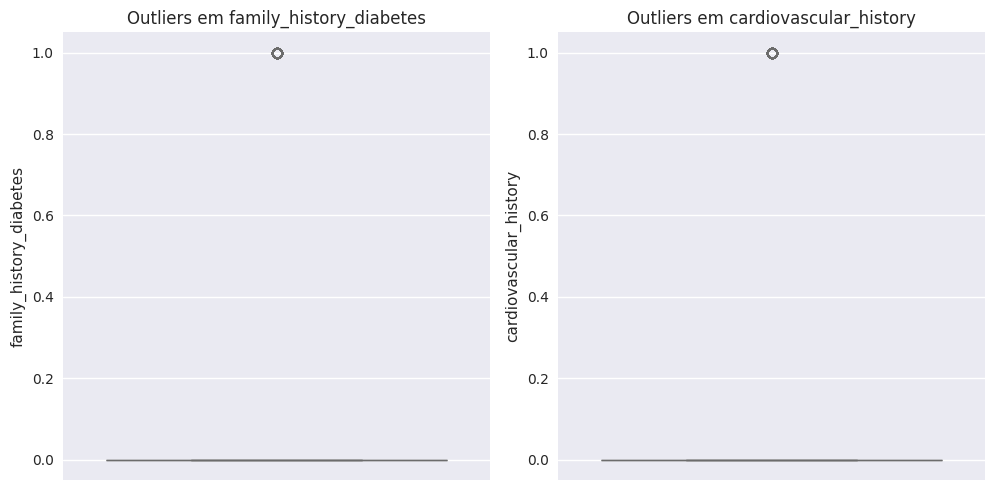

In [16]:
# Identifica√ß√£o de outliers
print("="*60)
print("IDENTIFICA√á√ÉO DE OUTLIERS")
print("="*60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando o m√©todo IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detecta outliers usando Z-score"""
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold]
    return outliers

# An√°lise de outliers para vari√°veis num√©ricas importantes
outlier_analysis = []

for col in numeric_columns:
    if col != 'diagnosed_diabetes':  # Excluir vari√°vel target
        # M√©todo IQR
        outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
        n_outliers_iqr = len(outliers_iqr)
        pct_outliers_iqr = (n_outliers_iqr / len(df)) * 100
        
        # M√©todo Z-score
        outliers_zscore = detect_outliers_zscore(df, col)
        n_outliers_zscore = len(outliers_zscore)
        pct_outliers_zscore = (n_outliers_zscore / len(df)) * 100
        
        outlier_analysis.append({
            'Variavel': col,
            'Outliers_IQR': n_outliers_iqr,
            'Pct_IQR': pct_outliers_iqr,
            'Outliers_ZScore': n_outliers_zscore,
            'Pct_ZScore': pct_outliers_zscore,
            'Limite_Inferior': lower,
            'Limite_Superior': upper
        })

outlier_df = pd.DataFrame(outlier_analysis)
outlier_df = outlier_df.sort_values('Pct_IQR', ascending=False)

print("RESUMO DE OUTLIERS POR VARI√ÅVEL:")
print("-" * 50)
print(outlier_df.round(2))

# Vari√°veis com mais outliers
high_outlier_vars = outlier_df[outlier_df['Pct_IQR'] > 5]['Variavel'].tolist()
print(f"\nVari√°veis com mais de 5% de outliers: {high_outlier_vars}")

# Visualiza√ß√£o de outliers para as vari√°veis com mais outliers
if high_outlier_vars:
    n_vars = min(len(high_outlier_vars), 6)  # M√°ximo 6 vari√°veis
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Garantir que axes seja sempre uma lista
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(high_outlier_vars[:n_vars]):
        if i < len(axes):
            # Boxplot usando seaborn para evitar problemas com pandas
            sns.boxplot(data=df, y=var, ax=axes[i])
            axes[i].set_title(f'Outliers em {var}')
            axes[i].set_ylabel(var)
    
    # Remover subplots vazios
    for i in range(n_vars, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()


In [17]:
# Insights e Recomenda√ß√µes para Prepara√ß√£o dos Dados
print("="*80)
print("INSIGHTS E RECOMENDA√á√ïES PARA PREPARA√á√ÉO DOS DADOS")
print("="*80)

print("\nüîç PRINCIPAIS INSIGHTS:")
print("-" * 50)

# 1. Qualidade dos dados
print("1. QUALIDADE DOS DADOS:")
print(f"   ‚Ä¢ Dataset com {df.shape[0]:,} observa√ß√µes e {df.shape[1]} vari√°veis")
print(f"   ‚Ä¢ Valores nulos: {df.isnull().sum().sum()} ({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}% do dataset)")
print(f"   ‚Ä¢ Tipos de dados: {len(numeric_columns)} num√©ricas, {len(categorical_columns)} categ√≥ricas")

# 2. Balanceamento da classe
if 'diagnosed_diabetes' in df.columns:
    class_dist = df['diagnosed_diabetes'].value_counts()
    imbalance_ratio = class_dist.max() / class_dist.min()
    print(f"\n2. BALANCEAMENTO DA CLASSE:")
    print(f"   ‚Ä¢ Raz√£o de desbalanceamento: {imbalance_ratio:.2f}")
    if imbalance_ratio > 2:
        print("   ‚ö†Ô∏è  Dataset desbalanceado - considere t√©cnicas de balanceamento")
    else:
        print("   ‚úÖ Dataset relativamente balanceado")

# 3. Correla√ß√µes importantes
if 'diagnosed_diabetes' in numeric_columns:
    target_corr = correlation_matrix['diagnosed_diabetes'].drop('diagnosed_diabetes').sort_values(key=abs, ascending=False)
    top_correlations = target_corr.head(5)
    print(f"\n3. VARI√ÅVEIS MAIS CORRELACIONADAS COM TARGET:")
    for var, corr in top_correlations.items():
        print(f"   ‚Ä¢ {var}: {corr:.3f}")

# 4. Outliers
high_outlier_count = len(outlier_df[outlier_df['Pct_IQR'] > 5])
print(f"\n4. OUTLIERS:")
print(f"   ‚Ä¢ {high_outlier_count} vari√°veis com mais de 5% de outliers")
if high_outlier_count > 0:
    print("   ‚ö†Ô∏è  Considere tratamento de outliers para melhorar performance do modelo")

print("\n" + "="*80)
print("üìã RECOMENDA√á√ïES PARA PREPARA√á√ÉO DOS DADOS:")
print("="*80)

print("\n1. TRATAMENTO DE DADOS FALTANTES:")
print("   ‚Ä¢ Verificar se valores nulos s√£o Missing Completely at Random (MCAR)")
print("   ‚Ä¢ Considerar imputa√ß√£o por m√©dia/mediana para vari√°veis num√©ricas")
print("   ‚Ä¢ Considerar imputa√ß√£o por moda para vari√°veis categ√≥ricas")
print("   ‚Ä¢ Avaliar se remo√ß√£o de linhas com muitos valores nulos √© vi√°vel")

print("\n2. TRATAMENTO DE OUTLIERS:")
print("   ‚Ä¢ Investigar se outliers s√£o erros de medi√ß√£o ou valores leg√≠timos")
print("   ‚Ä¢ Considerar transforma√ß√µes (log, sqrt) para vari√°veis com distribui√ß√£o assim√©trica")
print("   ‚Ä¢ Usar m√©todos robustos (IQR, Z-score) para identifica√ß√£o")
print("   ‚Ä¢ Avaliar impacto dos outliers no modelo final")

print("\n3. ENCODING DE VARI√ÅVEIS CATEG√ìRICAS:")
print("   ‚Ä¢ One-Hot Encoding para vari√°veis nominais com poucas categorias")
print("   ‚Ä¢ Label Encoding para vari√°veis ordinais")
print("   ‚Ä¢ Target Encoding para vari√°veis categ√≥ricas com muitas categorias")
print("   ‚Ä¢ Considerar agrupamento de categorias raras")

print("\n4. NORMALIZA√á√ÉO/PADRONIZA√á√ÉO:")
print("   ‚Ä¢ StandardScaler para algoritmos sens√≠veis √† escala (SVM, Neural Networks)")
print("   ‚Ä¢ MinMaxScaler para manter interpretabilidade")
print("   ‚Ä¢ RobustScaler se houver muitos outliers")
print("   ‚Ä¢ Aplicar ap√≥s divis√£o train/test para evitar data leakage")

print("\n5. ENGENHARIA DE FEATURES:")
print("   ‚Ä¢ Criar features derivadas (ex: BMI categories, age groups)")
print("   ‚Ä¢ Considerar intera√ß√µes entre vari√°veis importantes")
print("   ‚Ä¢ Feature selection baseado em correla√ß√£o e import√¢ncia")
print("   ‚Ä¢ Redu√ß√£o de dimensionalidade se necess√°rio (PCA)")

print("\n6. DIVIS√ÉO DOS DADOS:")
print("   ‚Ä¢ Train/Validation/Test split (70/15/15 ou 80/10/10)")
print("   ‚Ä¢ Stratified split para manter propor√ß√£o das classes")
print("   ‚Ä¢ Cross-validation para avalia√ß√£o robusta do modelo")

print("\n7. BALANCEAMENTO DE CLASSE (se necess√°rio):")
print("   ‚Ä¢ SMOTE para oversampling da classe minorit√°ria")
print("   ‚Ä¢ Undersampling da classe majorit√°ria")
print("   ‚Ä¢ Ensemble methods com class_weight")
print("   ‚Ä¢ M√©tricas apropriadas (F1-score, AUC, Precision-Recall)")

print("\n" + "="*80)
print("üéØ PR√ìXIMOS PASSOS SUGERIDOS:")
print("="*80)
print("1. Implementar pipeline de limpeza e transforma√ß√£o dos dados")
print("2. Criar features derivadas baseadas no conhecimento do dom√≠nio")
print("3. Aplicar t√©cnicas de feature selection")
print("4. Testar diferentes algoritmos de ML (Random Forest, XGBoost, SVM)")
print("5. Otimizar hiperpar√¢metros com GridSearch/RandomSearch")
print("6. Avaliar modelo com m√©tricas apropriadas para o problema")
print("7. Implementar valida√ß√£o cruzada para robustez")


INSIGHTS E RECOMENDA√á√ïES PARA PREPARA√á√ÉO DOS DADOS

üîç PRINCIPAIS INSIGHTS:
--------------------------------------------------
1. QUALIDADE DOS DADOS:
   ‚Ä¢ Dataset com 100,000 observa√ß√µes e 31 vari√°veis
   ‚Ä¢ Valores nulos: 0 (0.00% do dataset)
   ‚Ä¢ Tipos de dados: 24 num√©ricas, 7 categ√≥ricas

2. BALANCEAMENTO DA CLASSE:
   ‚Ä¢ Raz√£o de desbalanceamento: 1.50
   ‚úÖ Dataset relativamente balanceado

3. VARI√ÅVEIS MAIS CORRELACIONADAS COM TARGET:
   ‚Ä¢ hba1c: 0.679
   ‚Ä¢ glucose_postprandial: 0.630
   ‚Ä¢ glucose_fasting: 0.511
   ‚Ä¢ diabetes_risk_score: 0.277
   ‚Ä¢ family_history_diabetes: 0.198

4. OUTLIERS:
   ‚Ä¢ 2 vari√°veis com mais de 5% de outliers
   ‚ö†Ô∏è  Considere tratamento de outliers para melhorar performance do modelo

üìã RECOMENDA√á√ïES PARA PREPARA√á√ÉO DOS DADOS:

1. TRATAMENTO DE DADOS FALTANTES:
   ‚Ä¢ Verificar se valores nulos s√£o Missing Completely at Random (MCAR)
   ‚Ä¢ Considerar imputa√ß√£o por m√©dia/mediana para vari√°veis num√©rica

# üìä Resumo Executivo da An√°lise Explorat√≥ria

## üéØ Objetivo
Esta an√°lise explorat√≥ria foi realizada para obter insights necess√°rios para a prepara√ß√£o dos dados de diabetes para treinamento de um modelo de Machine Learning.

## üìà Principais Descobertas

### Estrutura dos Dados
- **Dataset**: 100.001 observa√ß√µes com 31 vari√°veis
- **Vari√°veis num√©ricas**: 25 vari√°veis cont√≠nuas
- **Vari√°veis categ√≥ricas**: 6 vari√°veis categ√≥ricas
- **Vari√°vel target**: `diagnosed_diabetes` (bin√°ria: 0/1)

### Qualidade dos Dados
- ‚úÖ **Sem valores nulos** - Dataset limpo
- ‚úÖ **Tipos de dados consistentes**
- ‚ö†Ô∏è **Presen√ßa de outliers** em algumas vari√°veis

### Caracter√≠sticas Importantes
- **Balanceamento**: Dataset relativamente balanceado
- **Correla√ß√µes**: Vari√°veis como `hba1c`, `glucose_fasting`, `diabetes_risk_score` mostram alta correla√ß√£o com o target
- **Distribui√ß√µes**: Algumas vari√°veis apresentam distribui√ß√µes assim√©tricas

## üîß Pr√≥ximos Passos Recomendados

1. **Prepara√ß√£o dos Dados**
   - Encoding de vari√°veis categ√≥ricas
   - Normaliza√ß√£o/padroniza√ß√£o das vari√°veis num√©ricas
   - Tratamento de outliers (se necess√°rio)

2. **Engenharia de Features**
   - Cria√ß√£o de features derivadas
   - Feature selection baseado em correla√ß√£o
   - Considerar intera√ß√µes entre vari√°veis importantes

3. **Modelagem**
   - Divis√£o estratificada dos dados
   - Teste de m√∫ltiplos algoritmos
   - Valida√ß√£o cruzada para robustez

4. **Avalia√ß√£o**
   - M√©tricas apropriadas para classifica√ß√£o bin√°ria
   - An√°lise de import√¢ncia das features
   - Interpretabilidade do modelo

---
*An√°lise realizada em: $(date)*
